In [1]:
import pandas as pd
import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

In [2]:
file_path = 'auto-mpg.csv'
raw = pd.read_csv(file_path)

In [3]:
raw.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [10]:
raw['model year'].min(), raw['model year'].max()

(np.int64(70), np.int64(82))

In [ ]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
# features of cars wrt to cylinders in engine
dr = raw.groupby('cylinders')[['horsepower','acceleration','weight','displacement']].agg('mean')
dr                         

,horsepower,acceleration,weight,displacement
cylinders,,,,
3,99.250000,13.250000,2398.500000,72.500000
4,78.654412,16.601471,2308.127451,109.796569
5,82.333333,18.633333,3103.333333,145.000000
6,101.410714,16.263095,3198.226190,218.142857
8,158.300971,12.955340,4114.718447,345.009709


<Axes: xlabel='model year', ylabel='horsepower'>

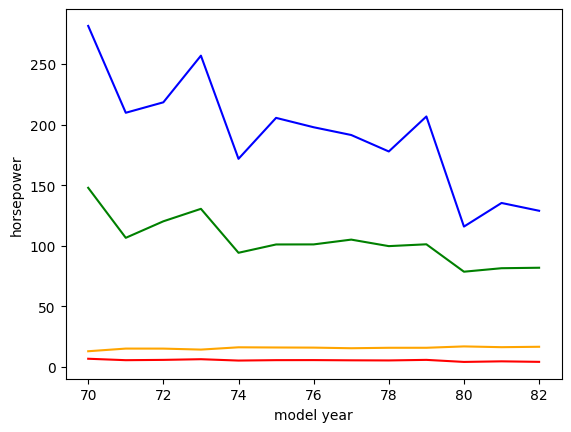

In [ ]:
drs = raw.groupby('model year')[['horsepower','acceleration','weight','displacement','cylinders']].agg('mean')
sns.lineplot(data=drs, x='model year', y='horsepower',errorbar=None,color='green')
sns.lineplot(data=drs, x='model year', y='acceleration',errorbar=None,color='orange')
#sns.lineplot(data=med, x='model year', y='weight',errorbar=None,color='violet')
sns.lineplot(data=drs, x='model year', y='displacement',errorbar=None,color='blue')
sns.lineplot(data=drs, x='model year', y='cylinders',errorbar=None,color='red')
plt.plot()

[]

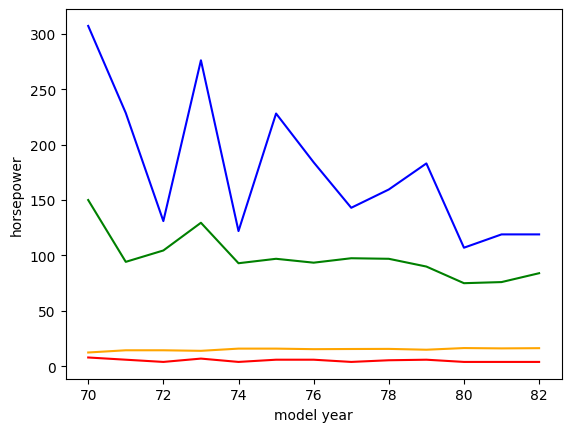

In [20]:
med = raw.groupby('model year')[['horsepower','acceleration','weight','displacement','cylinders']].agg('median')
sns.lineplot(data=med, x='model year', y='horsepower',errorbar=None,color='green')
sns.lineplot(data=med, x='model year', y='acceleration',errorbar=None,color='orange')
#sns.lineplot(data=med, x='model year', y='weight',errorbar=None,color='violet')
sns.lineplot(data=med, x='model year', y='displacement',errorbar=None,color='blue')
sns.lineplot(data=med, x='model year', y='cylinders',errorbar=None,color='red')
plt.plot()

[]

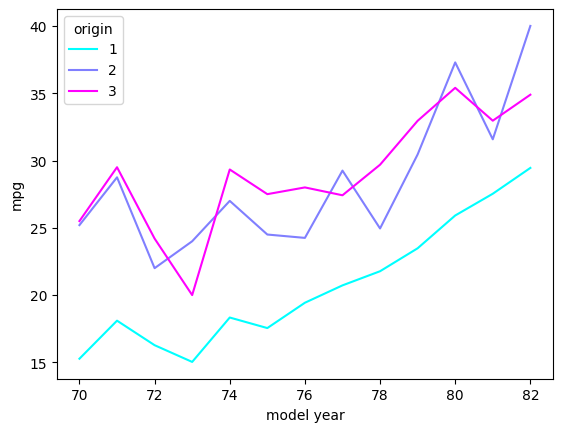

In [16]:
sns.lineplot(data=raw, x='model year', y='mpg', hue='origin',errorbar=None,palette='cool')
plt.plot()

[]

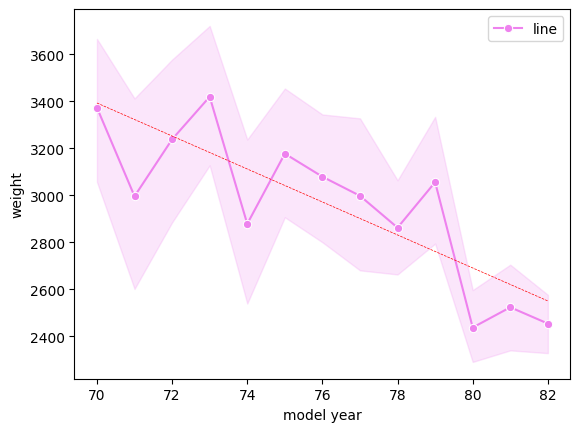

In [15]:
sns.lineplot(data=raw, x='model year', y='weight', label='line',marker='o',color='violet')
sns.regplot(data=raw, x='model year', y='weight', scatter=False, label ='Trend', color='red',line_kws={'linestyle':'--','linewidth':0.5},ci=None)
#sns.lmplot(data=raw, x='model year', y='weight', palette='cool', scatter=False,)
plt.plot()

In [10]:
print('acc vs cylinders', raw['acceleration'].corr(raw['cylinders']))
print('acc vs mpg', raw['acceleration'].corr(raw['mpg']))
print('acc vs displacement', raw['acceleration'].corr(raw['displacement']))

acc vs cylinders -0.5054194890521758
acc vs mpg 0.42028891210165065
acc vs displacement -0.5436840835009297


In [ ]:
# common cylinder configuration
raw['cylinders'].value_counts().sort_values(ascending=True)[::-1]

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

In [5]:
car = raw['car name'].values.reshape(-1, 1)
print(len(car))

398


- mpg: is target variable
- horsepower: is object convert to float
- find unique values in car_name

In [7]:
raw.shape

(398, 9)

In [17]:
raw['horsepower'] = pd.to_numeric(raw['horsepower'])
print('Horserpower change dtype:',raw['horsepower'].dtypes)

ValueError: Unable to parse string "?" at position 32

In [18]:
raw['horsepower'].iloc[32]

'?'

In [19]:
raw.iloc[30:33]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
30,28.0,4,140.0,90,2264,15.5,71,1,chevrolet vega 2300
31,25.0,4,113.0,95,2228,14.0,71,3,toyota corona
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto


In [23]:
raw[raw['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [3]:
l = ['!','@','#','?','^']
letters = []
for i in l:
    if raw['horsepower'].astype(str).str.contains(i,regex=False).any():
        letters.append(i)
print('Letters in horsepower:',letters)

Letters in horsepower: ['?']


In [3]:

raw['horsepower'] = raw['horsepower'].replace('?',np.nan)
raw['horsepower'] = raw['horsepower'].astype(float)
raw['horsepower'] = raw['horsepower'].fillna(raw['horsepower'].median())
raw.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [13]:
raw['horsepower'].min()

np.float64(46.0)

In [18]:
raw.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


[]

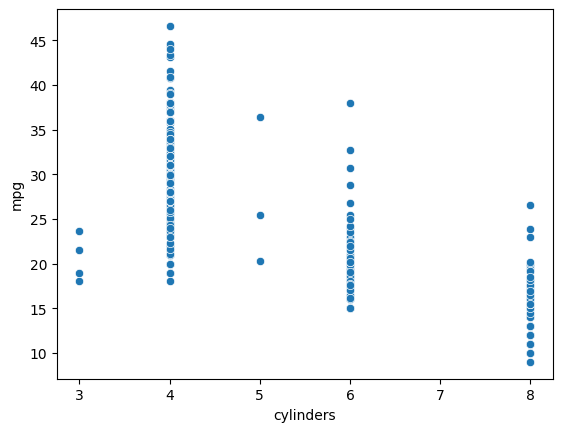

In [6]:
sns.scatterplot(data=raw, x='cylinders', y='mpg')
plt.plot()

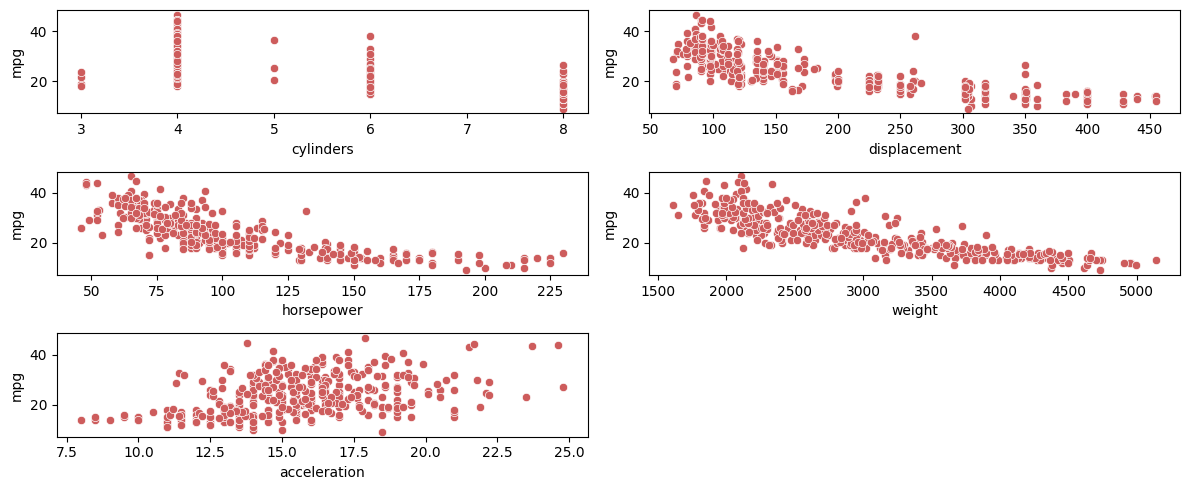

In [7]:
features = ['cylinders'	,'displacement',	'horsepower',	'weight',	'acceleration']
plt.figure(figsize=(12, 5))
for i, col in enumerate(features):
    plt.subplot(3, 2, i+1)
    sns.scatterplot(data= raw, x=raw[col], y='mpg', color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [39]:
raw.iloc[[32,126,354]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,93.5,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,93.5,2875,17.0,74,1,ford maverick
354,34.5,4,100.0,93.5,2320,15.8,81,2,renault 18i


In [40]:
raw['car name'].nunique()

305

In [5]:
numeric_features = raw.columns.to_list()
#print(numeric_features)
numeric_features = [x for x in numeric_features if x not  in ['car name', 'mpg']]

In [6]:
discrete_features=[feature for feature in numeric_features if len(raw[feature].unique())<=25]

continuous_features=[feature for feature in numeric_features if len(raw[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 3 discrete features : ['cylinders', 'model year', 'origin']

We have 4 continuous_features : ['displacement', 'horsepower', 'weight', 'acceleration']


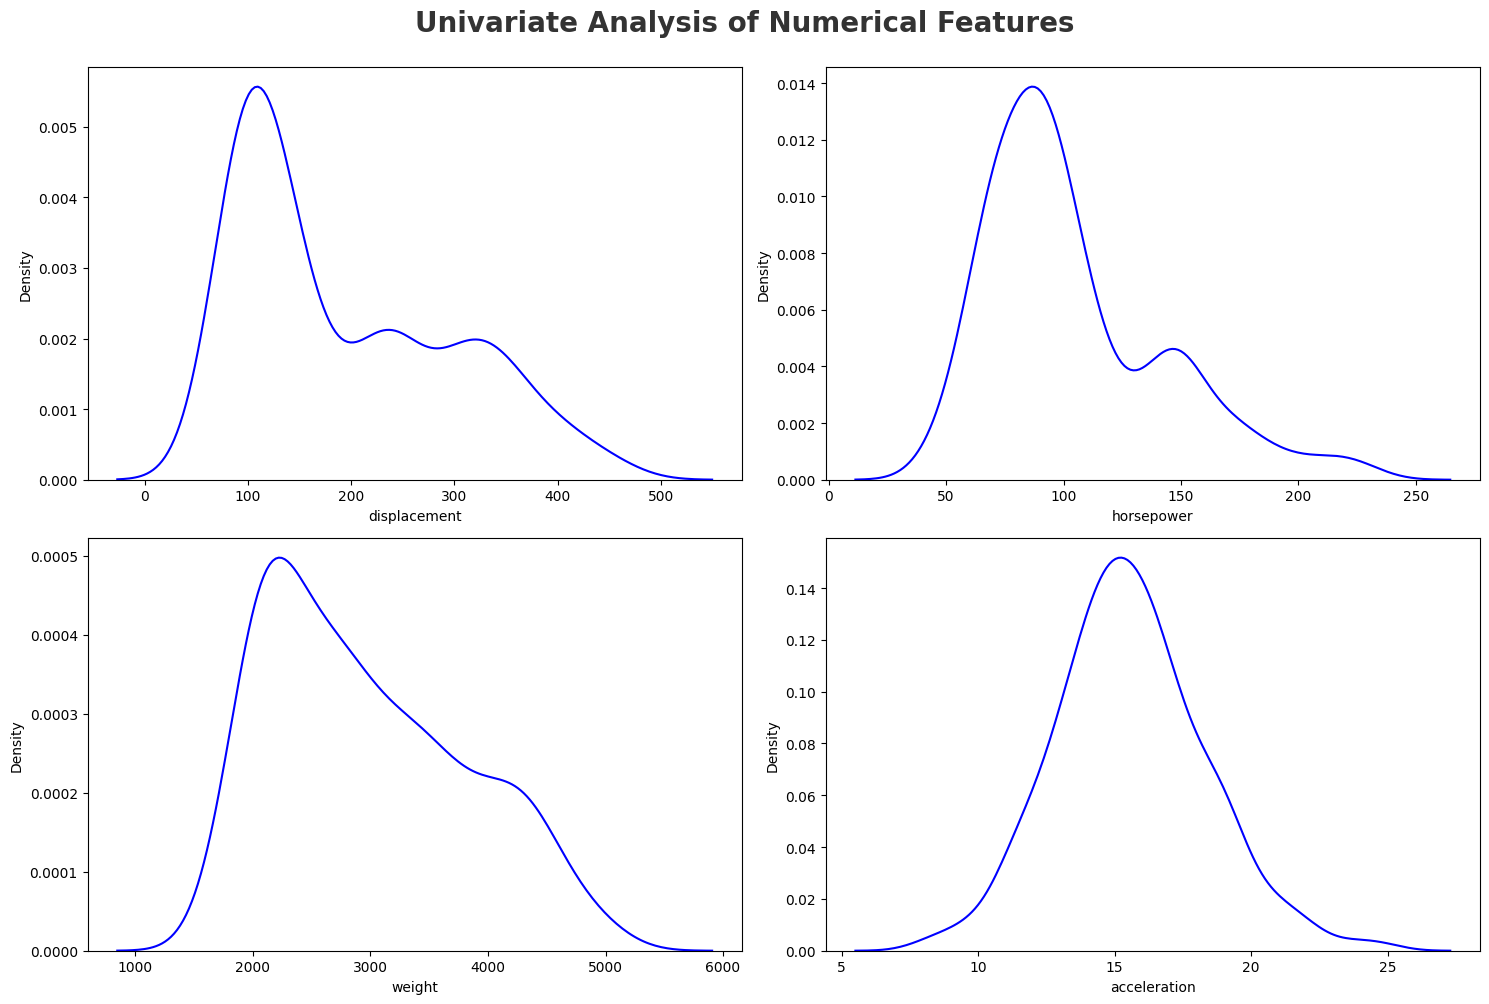

In [55]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(continuous_features)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=raw[continuous_features[i]], color='blue')
    plt.xlabel(continuous_features[i])
    plt.tight_layout()

In [57]:
raw[continuous_features].skew()

displacement    0.719645
horsepower      1.106224
weight          0.531063
acceleration    0.278777
dtype: float64

Displacement, horsepower, weight needs to be normalized

In [19]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
transform_features = ['displacement', 'horsepower','weight']
X_copy = pt.fit_transform(raw[transform_features])

In [20]:
X_copy = pd.DataFrame(X_copy,columns=transform_features)

In [66]:
X_copy.head()

,displacement,horsepower,weight
0,1.129793,0.862976,0.754910
1,1.332841,1.454628,0.929331
2,1.185134,1.225934,0.689074
3,1.114248,1.225934,0.686130
4,1.103773,1.053950,0.701794


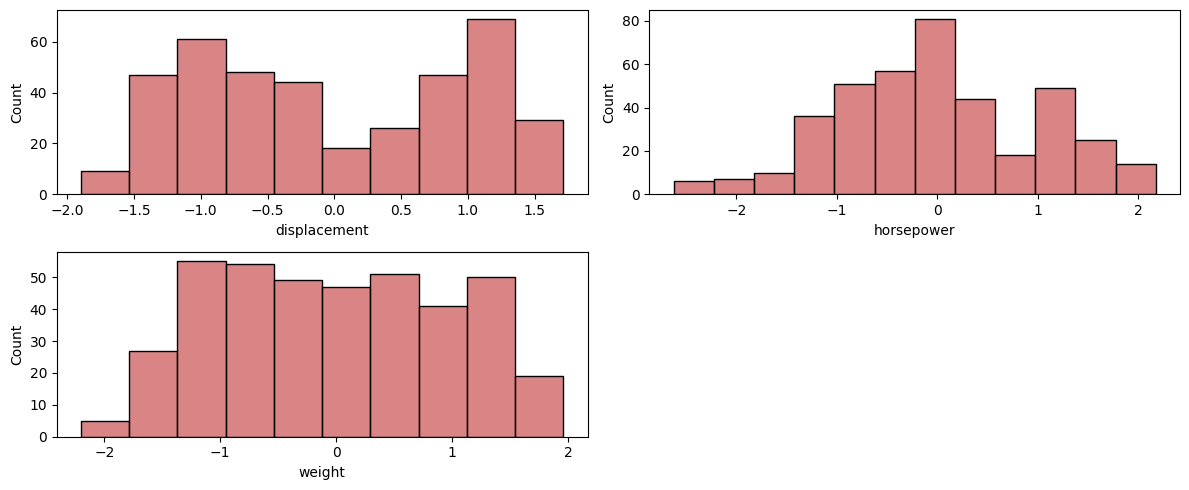

In [68]:
plt.figure(figsize=(12, 5))
for i, col in enumerate(transform_features):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=X_copy[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [70]:
X_copy[transform_features].skew()

displacement    0.076955
horsepower      0.025219
weight          0.034174
dtype: float64

In [21]:
raw_copy = raw.copy()
raw_copy[transform_features] = X_copy[transform_features]
raw_copy.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,1.129793,0.862976,0.754910,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,1.332841,1.454628,0.929331,11.5,70,1,buick skylark 320
2,18.0,8,1.185134,1.225934,0.689074,11.0,70,1,plymouth satellite
3,16.0,8,1.114248,1.225934,0.686130,12.0,70,1,amc rebel sst
4,17.0,8,1.103773,1.053950,0.701794,10.5,70,1,ford torino


In [4]:
def grouping_car_by_weights(df, column):
    labels = ['1500 - 2000','2000 - 2500','2500 - 3000','3000 - 3500','3500 - 4000','4000 - 4500','up-to 5000']
    bins = [1500,2000,2500,3000,3500,4000,4500, 5000]
    df['weight groups'] = pd.cut(df[column], bins=bins, labels=labels)
    return df

In [5]:
raw = grouping_car_by_weights(raw, 'weight')

In [8]:
raw_copy = raw.copy()
cnt = raw['car name'].value_counts()
cnts = cnt[cnt < 4].index.to_list()
#print('Number of car names with more than 4 occurences:',cnts)

In [9]:
raw['car name'] = raw['car name'].replace(cnts, 'other')
raw['car name'].value_counts()

car name
other                 353
ford pinto              6
ford maverick           5
amc matador             5
toyota corolla          5
amc hornet              4
chevrolet impala        4
toyota corona           4
amc gremlin             4
peugeot 504             4
chevrolet chevette      4
Name: count, dtype: int64

In [ ]:
performance = raw_copy.groupby(['car name'])[['weight','acceleration','displacement','cylinders','mpg']].agg(['mean'])
performance

,weight,acceleration,displacement,cylinders,mpg
,mean,mean,mean,mean,mean
car name,,,,,
amc gremlin,2746.250000,14.750000,223.750000,6.000000,19.500000
amc hornet,2926.250000,16.275000,223.750000,6.000000,19.375000
amc matador,3656.800000,15.580000,271.200000,6.800000,15.700000
chevrolet chevette,2090.250000,17.800000,94.750000,4.000000,30.400000
chevrolet impala,4458.500000,11.750000,388.500000,8.000000,13.000000
ford maverick,2930.600000,17.320000,220.000000,6.000000,19.800000
ford pinto,2499.166667,16.516667,132.166667,4.333333,22.916667
other,2982.997167,15.494334,194.179887,5.475921,23.675354


In [27]:
per = raw_copy[raw_copy['car name'] == 'ford pinto']
#per
per.groupby('model year')[['weight','acceleration','displacement','mpg']].agg('mean')


,weight,acceleration,displacement,mpg
model year,,,,
71,2046.0,19.00,98.0,25.0
73,2310.0,18.50,122.0,19.0
74,2451.0,16.50,122.0,26.0
75,2811.5,15.75,155.5,20.5
76,2565.0,13.60,140.0,26.5


In [94]:
print(discrete_features)

['cylinders', 'model year', 'origin']


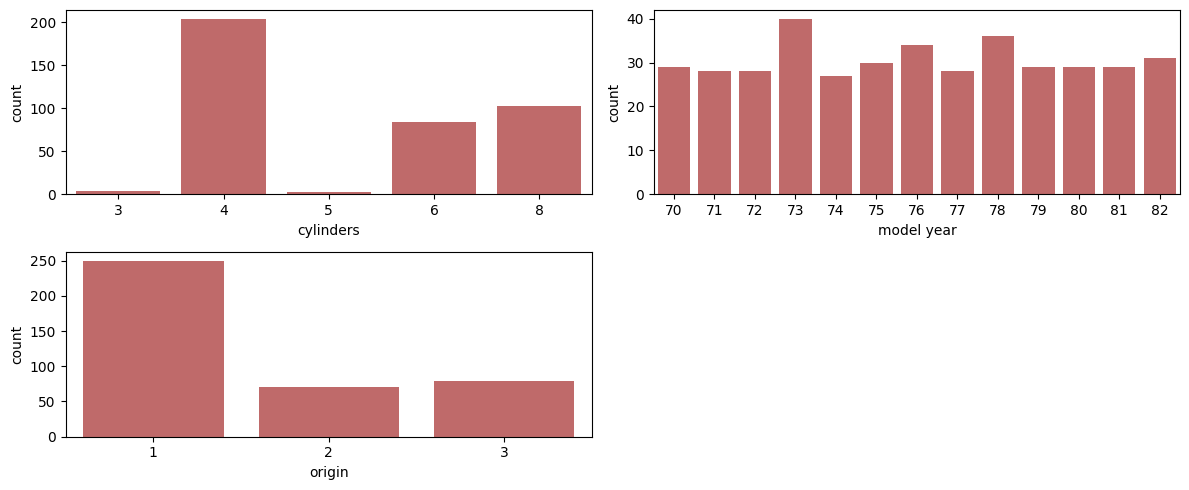

In [95]:
plt.figure(figsize=(12, 5))
for i, col in enumerate(discrete_features):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=raw_copy[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [16]:
print(raw['model year'].max(), raw['model year'].min())

82 70


In [ ]:
car = raw['car name'].values.reshape(-1, 1)

In [ ]:
car[0][0].split(' ')[0]

'chevrolet'

In [6]:
# car = df[column].values.reshape(-1,1)
rename_map = {'vw':'volkswagen', 'chevy':'chevrolet', 'vokswagen':'volkswagen', 'maxda':'mazda','toyouta':'toyota', 'chevroelt':'chevrolet'}
def extract_car_brand(df, old_column, new_column):
    df[new_column] =  df[old_column].astype(str).str.split().str[0]

    # rename car names
    if rename_map:
        df[new_column] = df[new_column].map(lambda x: rename_map.get(x,x))
    return df

    

In [45]:
raw['car name'].iloc[0].split(' ')[0]

'chevrolet'

In [7]:
raw = extract_car_brand(raw, 'car name', 'car brand')
raw.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,weight groups,car brand
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,3500 - 4000,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,3500 - 4000,buick
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,3000 - 3500,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,3000 - 3500,amc
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,3000 - 3500,ford


In [8]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
 9   car brand     398 non-null    object 
dtypes: float64(4), int64(4), object(2)
memory usage: 31.2+ KB


In [31]:
brand_name = raw['car brand'].value_counts()
popular_brands = brand_name[brand_name>5].index

filter_df = raw[raw['car brand'].isin(popular_brands)]

result = filter_df.groupby('car brand')[['cylinders'	,'displacement',	'horsepower',	'weight',	'acceleration']].agg('mean')
result

,cylinders,displacement,horsepower,weight,acceleration
car brand,,,,,
amc,6.357143,250.178571,113.946429,3280.642857,15.264286
audi,4.285714,111.857143,86.714286,2556.142857,15.942857
buick,6.470588,272.941176,136.411765,3553.352941,14.700000
chevrolet,6.170213,239.446809,114.638298,3317.382979,15.397872
chrysler,7.000000,330.166667,153.666667,3912.000000,13.300000
datsun,4.260870,103.260870,83.826087,2242.217391,16.408696
dodge,6.000000,223.125000,117.178571,3206.250000,14.460714
fiat,4.000000,92.125000,73.375000,2143.125000,15.650000
ford,6.078431,233.862745,111.127451,3301.215686,15.378431


[]

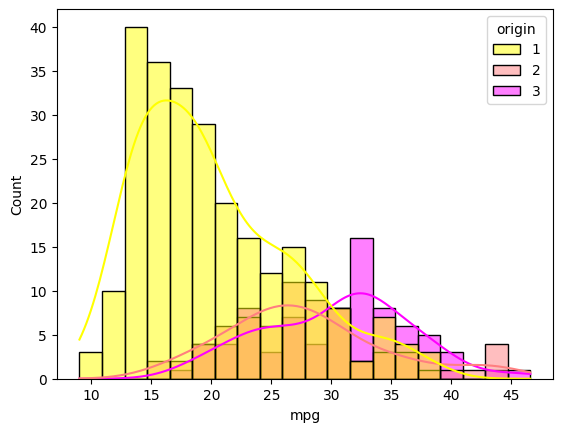

In [9]:
#c=sns.color_palette("hls", l=0.5, s=1)
sns.histplot(data=raw, x='mpg', bins=20, kde=True,  palette='spring_r', hue='origin')
plt.plot()

[]

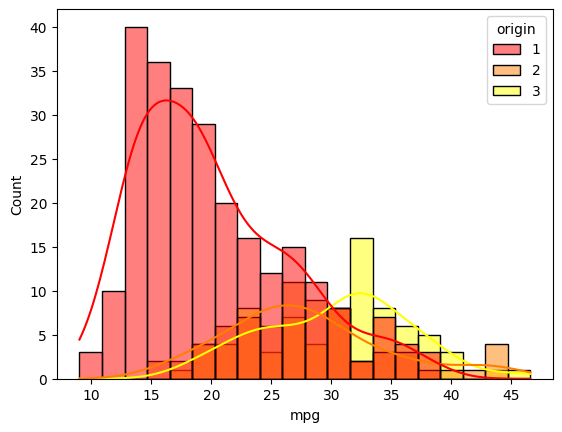

In [13]:
sns.histplot(data=raw, x='mpg', bins=20, kde=True,  palette='autumn', hue='origin')
plt.plot()

In [10]:
raw.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,weight groups,car brand
0,18.0,8,307.0,130.0,3504,12.0,70,1,other,3500 - 4000,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,1,other,3500 - 4000,buick
2,18.0,8,318.0,150.0,3436,11.0,70,1,other,3000 - 3500,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,1,other,3000 - 3500,amc
4,17.0,8,302.0,140.0,3449,10.5,70,1,other,3000 - 3500,ford


In [28]:
raw_copy.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,car brand
0,18.0,8,307.0,130.0,3504,12.0,70,1,other,other
1,15.0,8,350.0,165.0,3693,11.5,70,1,other,other
2,18.0,8,318.0,150.0,3436,11.0,70,1,other,other
3,16.0,8,304.0,150.0,3433,12.0,70,1,other,other
4,17.0,8,302.0,140.0,3449,10.5,70,1,other,other


In [11]:
X= raw.drop(columns=['mpg','weight'],axis=1)
y=raw['mpg']
print(X.columns)


Index(['cylinders', 'displacement', 'horsepower', 'acceleration', 'model year',
       'origin', 'car name', 'weight groups', 'car brand'],
      dtype='object')


In [12]:
X.head()

,cylinders,displacement,horsepower,acceleration,model year,origin,car name,weight groups,car brand
0,8,307.0,130.0,12.0,70,1,other,3500 - 4000,chevrolet
1,8,350.0,165.0,11.5,70,1,other,3500 - 4000,buick
2,8,318.0,150.0,11.0,70,1,other,3000 - 3500,plymouth
3,8,304.0,150.0,12.0,70,1,other,3000 - 3500,amc
4,8,302.0,140.0,10.5,70,1,other,3000 - 3500,ford


In [32]:
X['weight groups'].value_counts(dropna=False)

weight groups
2000 - 2500    103
2500 - 3000     83
3000 - 3500     59
4000 - 4500     47
3500 - 4000     45
1500 - 2000     44
up-to 5000      16
NaN              1
Name: count, dtype: int64

In [34]:
X[X['weight groups'].isna()]

,cylinders,displacement,horsepower,acceleration,model year,origin,car name,weight groups,car brand
44,8,400.0,175.0,12.0,71,1,other,NaN,pontiac


In [27]:
col = ['car brand', 'car name', 'weight groups']
for i in col:
    print(X[i].unique())

['chevrolet' 'buick' 'plymouth' 'amc' 'ford' 'pontiac' 'dodge' 'toyota'
 'datsun' 'volkswagen' 'peugeot' 'audi' 'saab' 'bmw' 'hi' 'mercury' 'opel'
 'fiat' 'oldsmobile' 'chrysler' 'mazda' 'volvo' 'renault' 'honda' 'subaru'
 'capri' 'mercedes-benz' 'cadillac' 'mercedes' 'triumph' 'nissan']
['other' 'chevrolet impala' 'amc hornet' 'ford maverick' 'peugeot 504'
 'amc gremlin' 'toyota corona' 'ford pinto' 'amc matador' 'toyota corolla'
 'chevrolet chevette']
['3500 - 4000', '3000 - 3500', '4000 - 4500', '2000 - 2500', '2500 - 3000', '1500 - 2000', 'up-to 5000', NaN]
Categories (7, object): ['1500 - 2000' < '2000 - 2500' < '2500 - 3000' < '3000 - 3500' < '3500 - 4000' < '4000 - 4500' < 'up-to 5000']


In [35]:
X = X.dropna(subset=['weight groups'])
y = y[X.index]

In [36]:
# Create Column Transformer with 3 types of transformers
oh_columns = ['car name','car brand']
or_columns = ['weight groups']
transform_columns= ['displacement','horsepower']
num_features = ['cylinders', 'acceleration','model year', 'origin']

from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(sparse_output=False, drop='first')
ordinal_encoder = OrdinalEncoder(categories=[['1500 - 2000','2000 - 2500','2500 - 3000','3000 - 3500','3500 - 4000','4000 - 4500','up-to 5000']])

transform_pipe = Pipeline(steps=[
    ('transformer', PowerTransformer(method='yeo-johnson'))
])

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, oh_columns),
        ("OrdinalEncoder", ordinal_encoder, or_columns),
        ("Transformer", transform_pipe, transform_columns),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [15]:
from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.1)
# x_train.shape, x_test.shape

In [37]:
x_transformed = preprocessor.fit_transform(X)
# dump preprocessor as pickel file and model too
# try grid search cv

In [38]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

In [39]:
def evaluate_reg(true, predicted):
    mae = mean_absolute_error(true, predicted) # Calculate mean absolute error
    mape = mean_absolute_percentage_error(true, predicted) # Calculate mean absolute percentage error
    rmse = np.sqrt(mean_squared_error(true, predicted)) # Calculate root mse
    r2 = r2_score(true, predicted)
    return mae, mape , rmse, r2

In [40]:
models = {
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Linear Regression": LinearRegression(),
    "AdaBoost Regression": AdaBoostRegressor()
}

In [41]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.10,random_state=42)
    
    models_list = []
    rmse_list = []
    r2_score_list= []

    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_mae, model_train_mape,\
        model_train_rmse,model_train_r2_score=evaluate_reg(y_train ,y_train_pred)


        # Test set performance
        model_test_mae,model_test_mape,\
        model_test_rmse,model_test_r2_score=evaluate_reg(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
        print('- Mean Absolute Percentage Error: {:.4f}'.format(model_train_mape)) 
        print('- Root Mean Squared Error: {:.4f}'.format(model_train_rmse))
        print('- R2 Score: {:.4f}'.format(model_train_r2_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Mean Absolute Error: {:.4f}'.format(model_test_mae))
        print('- Mean Absolute Percentage Error: {:.4f}'.format(model_test_mape))
        print('- Root Mean Squared Error: {:.4f}'.format(model_test_rmse))
        rmse_list.append(model_test_rmse)
        print('- R2 Score: {:.4f}'.format(model_test_r2_score))

        r2_score_list.append(model_test_r2_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list,rmse_list,r2_score_list)), columns=['Model Name','RMSE','R2 Score']).sort_values(by=['RMSE'], ascending=False)
        
    return report

In [42]:
base_model_report =evaluate_models(X=x_transformed, y=y, models=models)

Random Forest
Model performance for Training set
- Mean Absolute Error: 0.7328
- Mean Absolute Percentage Error: 0.0309
- Root Mean Squared Error: 1.0578
- R2 Score: 0.9819
----------------------------------
Model performance for Test set
- Mean Absolute Error: 1.8804
- Mean Absolute Percentage Error: 0.0823
- Root Mean Squared Error: 2.6452
- R2 Score: 0.8670


Decision Tree
Model performance for Training set
- Mean Absolute Error: 0.0000
- Mean Absolute Percentage Error: 0.0000
- Root Mean Squared Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Mean Absolute Error: 2.9450
- Mean Absolute Percentage Error: 0.1238
- Root Mean Squared Error: 5.0128
- R2 Score: 0.5223


Gradient Boosting
Model performance for Training set
- Mean Absolute Error: 1.1958
- Mean Absolute Percentage Error: 0.0520
- Root Mean Squared Error: 1.5887
- R2 Score: 0.9591
----------------------------------
Model performance for Test set
- Mean Absolute Error: 1.77

In [43]:
base_model_report

,Model Name,RMSE,R2 Score
1,Decision Tree,5.012834,0.522255
3,Linear Regression,3.340947,0.787789
4,AdaBoost Regression,2.967773,0.832548
0,Random Forest,2.645202,0.866971
2,Gradient Boosting,2.490229,0.882102


## Hyperparameter tuning 
- Random Forest
- Gradient Boosting
- Ada Boost

In [44]:
#Initialize few parameter for Hyperparamter tuning
# not selected yet
gradient_params = {
    'criterion': ['friedman_mse', 'squared_error'],
    'max_depth':range(3,7,1),
    'max_features': ['sqrt', 'log2']
}

rf_params = {
    'criterion': ['friedman_mse', 'squared_error', 'absolute_error'],
    "max_depth": range(3,7,1),
    "max_features": ['sqrt', 'log2'],
    "n_estimators": [20, 30, 40, 50]
}

ada_params = {
    'loss': ['linear', 'square' ,'exponential'],
    "n_estimators": [10, 20, 30 ]
}

In [45]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ('GradientBoosting', GradientBoostingRegressor(), gradient_params),
    ("RF", RandomForestRegressor(), rf_params),
    ("AdaBoost", AdaBoostRegressor(), ada_params)
]

In [46]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2, 
                                   n_jobs=-1)
    random.fit(x_transformed, y)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

c:\Users\prave\anaconda3\envs\flask-learning\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 16 is smaller than n_iter=100. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 16 candidates, totalling 48 fits


c:\Users\prave\anaconda3\envs\flask-learning\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 96 candidates, totalling 288 fits


c:\Users\prave\anaconda3\envs\flask-learning\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=100. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 9 candidates, totalling 27 fits
---------------- Best Params for GradientBoosting -------------------
{'max_features': 'log2', 'max_depth': 4, 'criterion': 'squared_error'}
---------------- Best Params for RF -------------------
{'n_estimators': 20, 'max_features': 'sqrt', 'max_depth': 6, 'criterion': 'squared_error'}
---------------- Best Params for AdaBoost -------------------
{'n_estimators': 10, 'loss': 'exponential'}


In [47]:
best_models = {
    "Random Forest Classifier": RandomForestRegressor(**model_param['RF']),
    "AdaBoost Regressor": AdaBoostRegressor(**model_param['AdaBoost']),
    "Gradient Boosting Regressor": GradientBoostingRegressor(**model_param['GradientBoosting']),
}
tuned_report =evaluate_models(X=x_transformed, y=y, models=best_models)

Random Forest Classifier
Model performance for Training set
- Mean Absolute Error: 1.8165
- Mean Absolute Percentage Error: 0.0805
- Root Mean Squared Error: 2.4627
- R2 Score: 0.9017
----------------------------------
Model performance for Test set
- Mean Absolute Error: 2.2245
- Mean Absolute Percentage Error: 0.1024
- Root Mean Squared Error: 2.9680
- R2 Score: 0.8325


AdaBoost Regressor
Model performance for Training set
- Mean Absolute Error: 2.1165
- Mean Absolute Percentage Error: 0.0942
- Root Mean Squared Error: 2.7255
- R2 Score: 0.8796
----------------------------------
Model performance for Test set
- Mean Absolute Error: 2.4326
- Mean Absolute Percentage Error: 0.1101
- Root Mean Squared Error: 3.0884
- R2 Score: 0.8187


Gradient Boosting Regressor
Model performance for Training set
- Mean Absolute Error: 1.1669
- Mean Absolute Percentage Error: 0.0514
- Root Mean Squared Error: 1.5610
- R2 Score: 0.9605
----------------------------------
Model performance for Test set
-

In [48]:
tuned_report

,Model Name,RMSE,R2 Score
1,AdaBoost Regressor,3.088359,0.818664
0,Random Forest Classifier,2.968011,0.832521
2,Gradient Boosting Regressor,2.412526,0.889344


In [49]:
import pickle

In [50]:
with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)
with open('saved_model.pkl', 'wb') as f:
    pickle.dump(best_models["Gradient Boosting Regressor"], f)


In [51]:
with open('preprocessor.pkl', 'rb') as pre_processor_file:
    preprocessor_pkl = pickle.load(pre_processor_file)
with open('saved_model.pkl', 'rb') as model_file:
    model_pkl = pickle.load(model_file)

In [55]:
input_data = {
    'car name': ['ford pinto'],
    'car brand': ['ford'],
    'weight groups': ['2000 - 2500'],
    'displacement': [98.0],
    'horsepower': [68.0],
    'cylinders': [4],
    'acceleration': [15.5],
    'model year': [74],
    'origin':[3],
}

In [56]:
input = pd.DataFrame(input_data)
input

,car name,car brand,weight groups,displacement,horsepower,cylinders,acceleration,model year,origin
0,ford pinto,ford,2000 - 2500,98.0,68.0,4,15.5,74,3


In [57]:
transformed_input = preprocessor_pkl.transform(input)
predictions = model_pkl.predict(transformed_input)
print('Predicted MPG:', predictions)

Predicted MPG: [27.74535177]


In [59]:
print(predictions[0])

27.745351769630137


In [62]:
print(f"Estimated mpg is: {round(predictions[0],3)} miles")

Estimated mpg is: 27.745 miles
